<center><img src="img/Marca-ITBA-Color-ALTA.png" width="250">

<h1>Master en Management & Analytics</h1>
</center>


### El Titanic

<img src="img/titanic.jpg" width="400"  >

- PassengerId: id del pasajero
- Pclass: la clase del pasajero (1 = 1st, 2 = 2nd, 3 = 3rd)
- Name: nombre del pasajero
- Sex: sexo del pasajero
- Age: edad en años
- SibSp: cantidad de hermanos/conyugues en el barco
- Parch: cantidad de padres/hijos en el barco
- Ticket: numero del ticket
- Fare: tarifa
- Cabin: número de cabina
- Embarked: puerto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)


In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

import scipy.stats as stats

In [2]:
dataset = pd.read_csv('data/titanic.csv')

dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Feature Has_cabin

In [5]:
dataset['has_cabin'] = dataset.Cabin.apply(lambda x: 1 if pd.notnull(x) else 0)

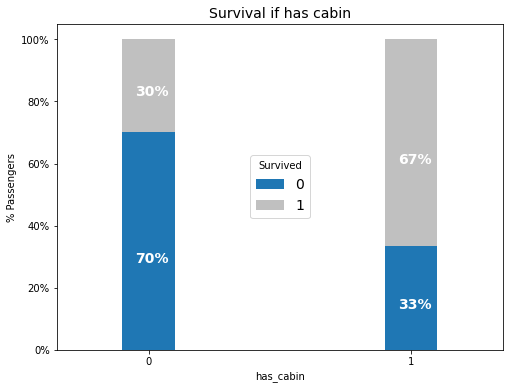

In [6]:
colors = ['#1f77b4','#C0C0C0']
has_cabin_survived = dataset.groupby(['has_cabin','Survived']).size().unstack()

ax = (has_cabin_survived.T*100.0 / has_cabin_survived.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Survived')
ax.set_ylabel('% Passengers')
ax.set_title('Survival if has cabin',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

In [7]:
contingency_cabin = pd.crosstab(dataset['has_cabin'],dataset['Survived'])
display(contingency_cabin)

Survived,0,1
has_cabin,,
0,481,206
1,68,136


In [8]:
stat, p_value, dof,expected = stats.chi2_contingency(contingency_cabin);
print(p_value)

6.7419704360811776e-21


Podemos rechazar la H0 de que 'has_cabin' y 'Survived' son independientes

Evidentemente, el hecho de que el dato de la cabina sea nulo, significa que la persona no tenía cabina. Este dato es importante y no hay que descartarlo. 

En general, al lidiar con datos faltantes, es muy importante entender si ese nulo se generó por un fenómeno aleatorio o sistemático. En el caso que sea sistemático esos datos faltantes pueden generar un sesgo en los datos y hay que tenerlo en cuenta.

##### Feature Sex

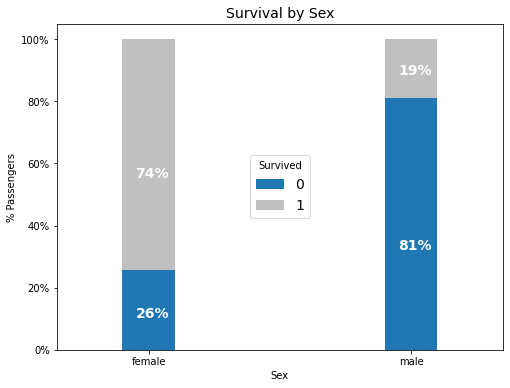

In [9]:
colors = ['#1f77b4','#C0C0C0']
sex_survived = dataset.groupby(['Sex','Survived']).size().unstack()

ax = (sex_survived.T*100.0 / sex_survived.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Survived')
ax.set_ylabel('% Passengers')
ax.set_title('Survival by Sex',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

In [10]:
contingency_sex =pd.crosstab(dataset['Sex'],dataset['Survived'])
display(contingency_sex)

Survived,0,1
Sex,,
female,81,233
male,468,109


In [11]:
stat,p_value,dof,expected=stats.chi2_contingency(contingency_sex);
print(p_value)

1.1973570627755645e-58


Podemos rechazar la H0 de que 'Sex' y 'Survived' son independientes

##### Feature Is_alone

In [12]:
dataset['is_alone'] = dataset.loc[:,['SibSp','Parch']].apply(\
                                        lambda x: 1 if x.sum()==0 else 0, axis=1)

In [13]:
dataset.loc[:,['SibSp','Parch', 'is_alone']].sample(10)

,SibSp,Parch,is_alone
453,1,0,0
452,0,0,1
578,1,0,0
469,2,1,0
662,0,0,1
261,4,2,0
861,1,0,0
734,0,0,1
66,0,0,1
419,0,2,0


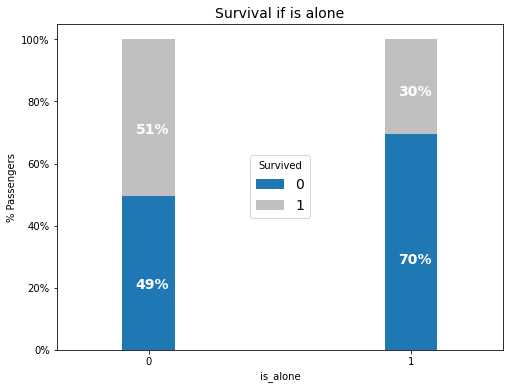

In [14]:
colors = ['#1f77b4','#C0C0C0']
is_alone_survived = dataset.groupby(['is_alone','Survived']).size().unstack()

ax = (is_alone_survived.T*100.0 / is_alone_survived.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Survived')
ax.set_ylabel('% Passengers')
ax.set_title('Survival if is alone',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

In [15]:
contingency_alone =pd.crosstab(dataset['is_alone'],dataset['Survived'])
display(contingency_alone)

Survived,0,1
is_alone,,
0,175,179
1,374,163


In [16]:
stat,p_value,dof,expected=stats.chi2_contingency(contingency_alone);
print(p_value)

1.9726543846517113e-09


Podemos rechazar la H0 de que 'is_alone' y 'Survived' son independientes

##### Feature Fare

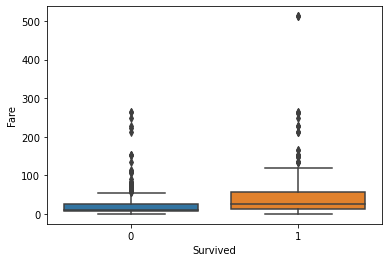

In [17]:
sns.boxplot(x = dataset.Survived, y = dataset.Fare);

Hagamos un t-test para ver si las medias son significativamente diferentes:

In [18]:
fare_0= dataset.loc[dataset['Survived']==0,'Fare'] 
fare_1= dataset.loc[dataset['Survived']==1,'Fare']

In [19]:
print(fare_0.mean())
print(fare_0.std())

22.117886885245877
31.388206530563984


In [20]:
print(fare_1.mean())
print(fare_1.std())

48.39540760233917
66.59699811829472


In [21]:
t, p_value = stats.ttest_ind(fare_0,fare_1, equal_var=False)

print('el estadístico t observado vale',t)
print('el p-valor asociado es',p_value)
print('Podemos rechazar la hipótesis nula de que las medias son iguales con ',np.round((1-p_value),4)*100,'% de confianza')

el estadístico t observado vale -6.839099259085254
el p-valor asociado es 2.6993323503141236e-11
Podemos rechazar la hipótesis nula de que las medias son iguales con  100.0 % de confianza


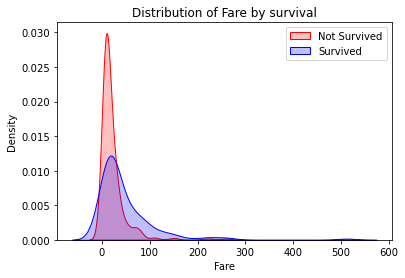

In [22]:
ax = sns.kdeplot(dataset.Fare[(dataset["Survived"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(dataset.Fare[(dataset["Survived"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Survived","Survived"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Fare')
ax.set_title('Distribution of Fare by survival');

##### Feature Age

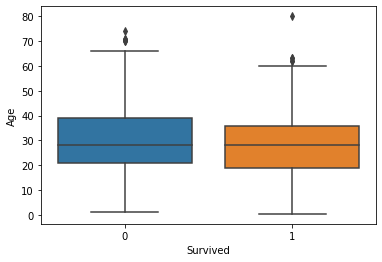

In [23]:
sns.boxplot(x = dataset.Survived, y = dataset.Age);

In [24]:
age_0= dataset.loc[dataset['Survived']==0,'Age'].dropna()
age_1= dataset.loc[dataset['Survived']==1,'Age'].dropna()

t_age, p_value_age = stats.ttest_ind(age_0,age_1,equal_var=True)

print('el estadístico t observado vale',t_age)
print('el p-valor asociado es',p_value_age)
print('Podemos rechazar la hipótesis nula de que las medias son iguales con ',np.round((1-p_value_age),4)*100,'% de confianza')

el estadístico t observado vale 2.06668694625381
el p-valor asociado es 0.03912465401348249
Podemos rechazar la hipótesis nula de que las medias son iguales con  96.09 % de confianza


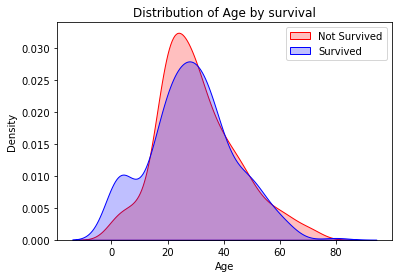

In [25]:
ax = sns.kdeplot(dataset.Age[(dataset["Survived"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(dataset.Age[(dataset["Survived"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Survived","Survived"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Age')
ax.set_title('Distribution of Age by survival');

In [26]:
dataset['infant'] = dataset.Age.apply(lambda x: 1 if x<=6 else 0)

In [27]:
dataset['Pclass'] = dataset['Pclass'].astype('str')

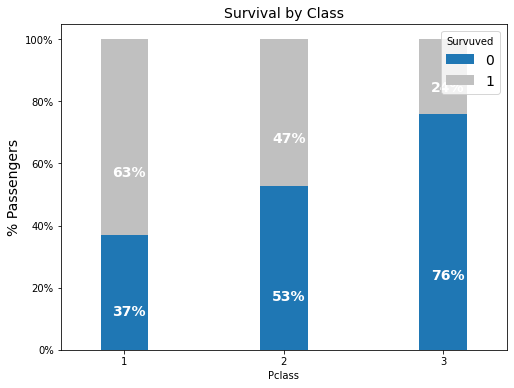

In [28]:
colors = ['#1f77b4','#C0C0C0']
Pclass_churn = dataset.groupby(['Pclass','Survived']).size().unstack()

ax = (Pclass_churn.T*100.0 / Pclass_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Survuved')
ax.set_ylabel('% Passengers',size = 14)
ax.set_title('Survival by Class',size = 14)

# Agregamos la etiqueta a cada barra:
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.3*height),
                color = 'white',
               weight = 'bold',
               size = 14)

In [29]:
contingency_class = pd.crosstab(dataset['Pclass'],dataset['Survived'])
display(contingency_class)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [30]:
stat,p_value,dof,expected = stats.chi2_contingency(contingency_class);
print(p_value)

4.549251711298793e-23


Podemos rechazar la H0 de que 'Pclass' y 'Survived' son independientes

In [31]:
dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.')

dataset['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [32]:
dataset[['Title', 'Name']].isnull().sum()

Title    0
Name     0
dtype: int64

In [33]:
dataset['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [34]:
dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms'], 'Miss')
dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess',\
             'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

In [35]:
dataset['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Other      23
Name: Title, dtype: int64

### ¡Muchas gracias por la atención!